<a href="https://colab.research.google.com/github/swarnava-96/Financial-Analytics-with-Python/blob/main/Simple_Portfolio_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Creating a Simple Portfolio using Python**
In this project, focus will be on creating a sample portfolio and finding out portfolio simple returns, get daily returns, volatility, etc.The data is extracted from Yahoo Finance using Pandas Data Reader. 

### Importing the necessary libraries

In [1]:
!pip install pandas-datareader --upgrade

In [9]:
from datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")

### Lets start creating our portfolio

In [10]:
# Getting the stock symbols for our portfolio
## FAANG

stocksymbols = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]

In [11]:
# Getting the stock starting date
## I have took this starting date because Facebook did not have an Initial Public Offering(IPL) since mid 2012

stockStartDate = "2013-01-01"

In [12]:
# Getting todays date and formatting into "YYYY-mm-dd"

today = datetime.today().strftime("%Y-%m-%d")
print(today)

2021-09-08


In [13]:
# Get the number of assets in the portfolio

numAssets = len(stocksymbols)
print("You have " + str(numAssets) + " assets in your portfolio." )

You have 5 assets in your portfolio.


In [18]:
# Lets create a function to get the stock prices in the portfolio

def getMyPortfolio(stocks = stocksymbols, start = stockStartDate, end = today, col = "Adj Close"):
  data = web.DataReader(stocks, data_source = 'yahoo', start = start, end = end)[col]
  return data

In [15]:
# Lets get the stock portfolio Adj Close price

my_stocks = getMyPortfolio(stocksymbols)
my_stocks

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,16.985447,13.144286,360.274597
2013-01-03,27.770000,258.480011,16.771053,13.798571,360.483826
2013-01-04,28.760000,259.149994,16.303900,13.711429,367.607117
2013-01-07,29.420000,268.459991,16.207998,14.171429,366.003143
2013-01-08,29.059999,266.380005,16.251616,13.880000,365.280823
...,...,...,...,...,...
2021-09-01,382.049988,3479.000000,152.509995,582.070007,2916.840088
2021-09-02,375.279999,3463.120117,153.649994,588.549988,2884.379883
2021-09-03,376.260010,3478.050049,154.300003,590.530029,2895.500000


In [20]:
# lets create a function to visualize the portfolio

def showGraph(stocks = stocksymbols, start = stockStartDate, end = today, col = "Adj Close"):

  # Creating a title for the portfolio
  title = "Portfolio " + col + " Price History"

  # Get the stocks
  my_stocks = getMyPortfolio(stocks = stocks, start = start, end = end, col = col)

  # Give the figure size
  plt.figure(figsize = (12.2,4.5))

  # Lets loop through each stock and plot the price
  for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label = c)

  plt.title(title)
  plt.xlabel("Date", fontsize = 18)
  plt.ylabel(col + " Price USD ($)", fontsize = 18)
  plt.legend(my_stocks.columns.values, loc = "upper left")
  plt.show();

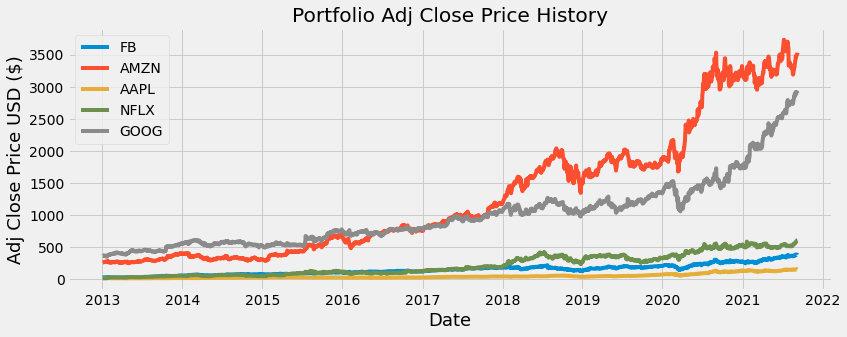

In [21]:
# Lets check the Adjusted stock price for FAANG

showGraph(stocksymbols)

Stock prices for Amazon was above $2000 for the years 2018 and later.

In [23]:
# Lets calculate the simple returns
## formula = (New price/old price) - 1 


daily_simple_returns = my_stocks.pct_change(1)
daily_simple_returns

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,-0.001974
...,...,...,...,...,...
2021-09-01,0.007038,0.002365,0.004479,0.022629,0.002612
2021-09-02,-0.017720,-0.004564,0.007475,0.011133,-0.011129
2021-09-03,0.002611,0.004311,0.004230,0.003364,0.003855


In [24]:
# Lets see the stock correlations

daily_simple_returns.corr()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,1.000000,0.522473,0.461011,0.362352,0.572462
AMZN,0.522473,1.000000,0.461810,0.452412,0.602749
AAPL,0.461011,0.461810,1.000000,0.276371,0.526176
NFLX,0.362352,0.452412,0.276371,1.000000,0.415459
GOOG,0.572462,0.602749,0.526176,0.415459,1.000000


In [25]:
# Covariance matrix for simple returns

daily_simple_returns.cov()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,0.000460,0.000213,0.000177,0.000221,0.000198
AMZN,0.000213,0.000362,0.000157,0.000245,0.000185
AAPL,0.000177,0.000157,0.000319,0.000140,0.000151
NFLX,0.000221,0.000245,0.000140,0.000807,0.000190
GOOG,0.000198,0.000185,0.000151,0.000190,0.000259


Here, the diagonal elements show the variance which shows the spread from mean. The higher the variance of asset price, the higher the risk, higher the return and higher the volatility. The lower the variance, the lower the risk, lower the return and lower the volatility. The other elements in the matrix indicates the covariance.

In [26]:
# Lets see only the variances 

daily_simple_returns.var()

Symbols
FB      0.000460
AMZN    0.000362
AAPL    0.000319
NFLX    0.000807
GOOG    0.000259
dtype: float64

In [27]:
# Standard Deviation for daily simple returns(Stock volatility)

print("The Stock Volatility:")
daily_simple_returns.std()

The Stock Volatility:


Symbols
FB      0.021447
AMZN    0.019036
AAPL    0.017870
NFLX    0.028404
GOOG    0.016092
dtype: float64

We can see the most volatile stock is Netflix and the least volatile stock is Google. The higher the volatility the higher the return.

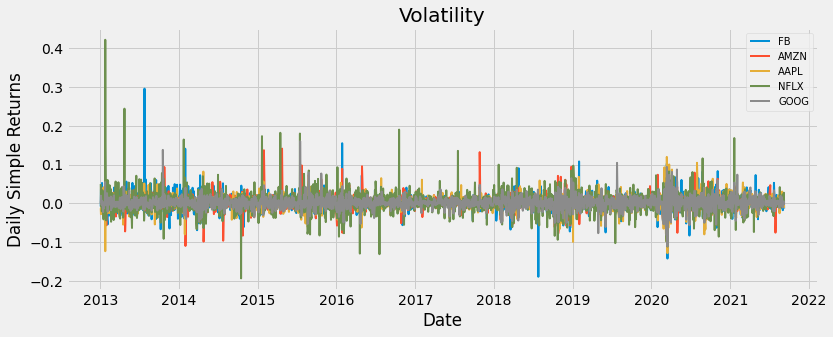

In [28]:
# Lets visualize the stocks daily returns/Volatility

plt.figure(figsize = (12,4.5))

# Loop through each stock and plot the simple returns
for c in daily_simple_returns.columns.values:
  plt.plot(daily_simple_returns[c], lw = 2, label = c)

# Create a legend
plt.legend(loc = "upper right", fontsize = 10)
plt.title("Volatility")
plt.ylabel("Daily Simple Returns")
plt.xlabel("Date")
plt.show()

We can see that Netflix is quite volatile.

In [31]:
# Lets calculate the mean of the Daily Simple Returns

dailyMeanSimpleReturn = daily_simple_returns.mean()

# Print
print("The Daily Mean Simple Return is:")
print(dailyMeanSimpleReturn)

The Daily Mean Simple Return is: 
Symbols
FB      0.001417
AMZN    0.001379
AAPL    0.001171
NFLX    0.002144
GOOG    0.001082
dtype: float64


Netflx will give a higher mean daily return and Google will give the lowest.

In [32]:
# Lets calculate the Expected Portfolio Daily Return
# Lets suppose we invest 40% FB, 10% AMZN, 30% AAPL, 10 NFLX, 10% GOOG of our portfolio

randomWeights = np.array([0.4, 0.1, 0.3, 0.1, 0.1])

portfolioSimpleReturns = np.sum(randomWeights * dailyMeanSimpleReturn)

print("The Daily Expected Portfolio return is " + str(portfolioSimpleReturns))

The Daily Expected Portfolio return is 0.0013789190378152396


In [33]:
# Lets get the yearly simple returns

print("Expected Annualised Portfolio Simple Return is " + str(portfolioSimpleReturns * 252))

Expected Annualised Portfolio Simple Return is 0.34748759752944036


Out of 365 days in the year 2021, 104 days are weekend days (Saturday and Sunday) when the stock exchanges stay closed. Apart from the weekends, there are 13 holidays in 2021. Hence, there are 252 trading days. 
With these weights we can expect a 35% return on our stocks.

In [35]:
# Lets calculate the growth on the investment

dailyCumSimplReturns = (daily_simple_returns + 1).cumprod()
dailyCumSimplReturns

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.991786,1.004547,0.987378,1.049777,1.000581
2013-01-04,1.027143,1.007151,0.959875,1.043147,1.020353
2013-01-07,1.050714,1.043333,0.954229,1.078144,1.015900
2013-01-08,1.037857,1.035249,0.956796,1.055972,1.013896
...,...,...,...,...,...
2021-09-01,13.644642,13.520656,8.978863,44.283120,8.096158
2021-09-02,13.402857,13.458941,9.045979,44.776109,8.006060
2021-09-03,13.437857,13.516964,9.084247,44.926748,8.036925


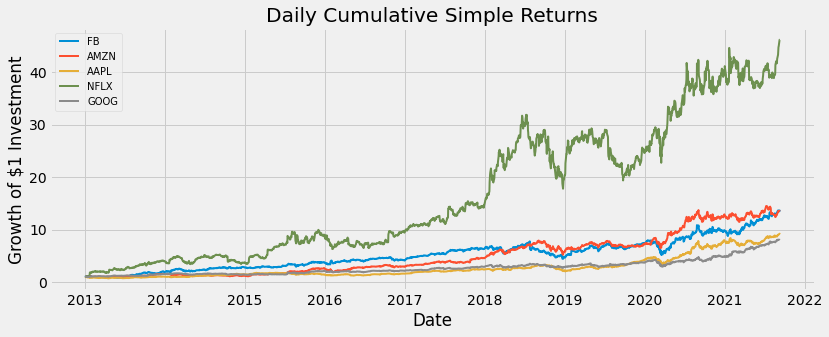

In [37]:
# Visualize the daily cumulative simple return

plt.figure(figsize = (12.2,4.5))
for c in dailyCumSimplReturns.columns.values:
  plt.plot(dailyCumSimplReturns.index, dailyCumSimplReturns[c], lw =2, label = c)

plt.legend(loc = "upper left", fontsize = 10)
plt.xlabel("Date")
plt.ylabel("Growth of $1 Investment")
plt.title("Daily Cumulative Simple Returns")
plt.show();

We can see that if we have invested a dollar in Netflix stocks in 2013, it would have given a return of 40% now in 2021. Similarly, for Google it would have given back a return of less than 10% in 2021.